 ## 0) charger les jeux de données et import python

Bonne pratique : tous les imports sont au début du fichier

In [5]:
# faites vos imports dans cette cellule
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# chargez les données
df_orders = pd.read_csv('../data/exploration/orders.csv')
df_orders_products_prior = pd.read_csv('../data/exploration/order_products__prior.csv')
# df_orders_products_train = pd.read_csv('../data/exploration/order_products__train.csv')
df_products = pd.read_csv('../data/exploration/products.csv')
df_departments = pd.read_csv('../data/exploration/departments.csv')
df_aisles = pd.read_csv('../data/exploration/aisles.csv')

 ## 1) Comprendre le contenu des différents fichiers

In [4]:
# df.head(), describe(), unique, n_unique sont vos amis
# la documentation fournie aussi !
df_orders.head()

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  


In [5]:
df_orders_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
df_orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [10]:
df_orders.isna().value_counts()

order_id  user_id  eval_set  order_number  order_dow  order_hour_of_day  days_since_prior_order
False     False    False     False         False      False              False                     3214874
                                                                         True                       206209
dtype: int64

Quel fichiers choisir pour l'exploration ?

## 2) Fusionner les fichiers choisis pour obtenir un dataframe permettant la visualisation

In [2]:
# pd.merge(df1, df2, on=col_name_to_merge, how='left') peut être un ami
df_complete = pd.merge(
  pd.read_csv('../data/exploration/order_products__prior.csv'),
  pd.read_csv('../data/exploration/products.csv'),
  on='product_id',
)
df_complete = pd.merge(
  df_complete,
  pd.read_csv('../data/exploration/departments.csv'),
  on='department_id',
)
df_complete = pd.merge(
  df_complete,
  pd.read_csv('../data/exploration/aisles.csv'),
  on='aisle_id',
)
df_complete = pd.merge(
  df_complete,
  pd.read_csv('../data/exploration/orders.csv'),
  on='order_id',
)

In [3]:
df_complete.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables,202279,prior,3,5,9,8.0
2,2,17794,6,1,Carrots,83,4,produce,fresh vegetables,202279,prior,3,5,9,8.0
3,2,43668,9,0,Classic Blend Cole Slaw,123,4,produce,packaged vegetables fruits,202279,prior,3,5,9,8.0
4,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings,202279,prior,3,5,9,8.0


In [7]:
# supprimez les colonnes devenues inutiles
del df_complete['aisle_id']
del df_complete['department_id']
del df_complete['product_id']

## 3) Explorer les données

- regarder la répartition des différentes variables dans le jeu de données et leurs proportions
    - vous pouvez pour visualiser faire des camemberts avec matplotlib.pie ou des histogrames avec sns.barplot
    - faites un premier jet, puis essayer d'améliorer leur rendu (fusionner les categories trop petites, ...)
    - tout graphe doit avoir un titre et une description du contenu de chaque axe

In [12]:
df_complete['department'].unique()

array(['dairy eggs', 'produce', 'pantry', 'meat seafood', 'frozen',
       'beverages', 'snacks', 'breakfast', 'deli', 'dry goods pasta',
       'international', 'household', 'canned goods', 'personal care',
       'other', 'missing', 'bakery', 'pets', 'bulk', 'babies', 'alcohol'],
      dtype=object)

In [20]:
df_complete['department'].value_counts()

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

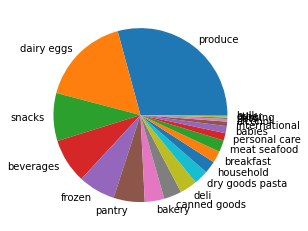

In [19]:
values = df_complete['department'].value_counts()
_ = plt.pie(values, labels=values.index)

- regarder la corrélation des variables avec l'objectif
    - par exemple y a-t-il des jours avec plus de commandes ?
    - l'heure a-t-elle une influence sur l'achat ?
    - est-ce que les personnes commandent souvent le même jour de la semaine ?
    - quel est le délai moyen entre deux commandes de la même personne ?

In [41]:
data = df_complete[['order_dow', 'order_id']].groupby('order_dow').count()
data['order_id']
# plt.plot(data['order_dow'], ['order_id'])
# data.head()

order_dow
0    6209666
1    5665856
2    4217798
3    3844117
4    3787215
5    4209533
6    4500304
Name: order_id, dtype: int64

- Observer les utilisateurs. Y-a-t-il des utilisateurs ayant des profils similaires ?
    - faisants leur achats aux même heures
    - achetant les même types de produits
    ...